주요 단계
회귀 분석:

독립 변수: 하루30분이상운동
종속 변수: BMI
남학생과 여학생 데이터를 각각 사용하여 회귀 분석 수행.
잔차의 가정 검토:

정규성: Q-Q Plot과 Shapiro-Wilk Test로 잔차가 정규성을 따르는지 확인.
등분산성: Breusch-Pagan Test로 잔차가 등분산성을 만족하는지 검정.
시각화:

회귀선을 포함한 산점도로 관계를 시각적으로 확인.
결과 확인
잔차의 정규성: p-value가 0.05보다 작으면 잔차가 정규성을 따르지 않음을 의미.
등분산성: p-value가 0.05보다 크면 잔차가 등분산성을 만족함.
회귀선 시각화: 운동 빈도와 BMI의 관계를 각 성별별로 확인.

In [16]:
import pandas as pd

file_path = '/Users/sim-yujin/Desktop/2-2 과목/통계적 데이터 분석/팀프로젝트/team-project/data/school_health.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인하세요.")


print(data[['하루30분이상운동']].isnull().sum())

cleaned_data = data.dropna(subset=['BMI', '하루30분이상운동'])
print(f"Cleaned data size: {cleaned_data.shape}")

# 성별로 데이터 분리
male_data = cleaned_data[cleaned_data['성별'] == '남']
female_data = cleaned_data[cleaned_data['성별'] == '여']



데이터 로드 성공!
하루30분이상운동    39684
dtype: int64
Cleaned data size: (53038, 114)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# IQR 계산
Q1 = cleaned_data['BMI'].quantile(0.25)  # 1사분위수
Q3 = cleaned_data['BMI'].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1

# 극단치 기준 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"BMI IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# 극단치 제거
filtered_data = cleaned_data[(cleaned_data['BMI'] >= lower_bound) & (cleaned_data['BMI'] <= upper_bound)]
print(f"극단치 제거 후 데이터 크기: {filtered_data.shape}")

# 확인: 제거된 데이터 개수
removed_outliers = cleaned_data.shape[0] - filtered_data.shape[0]
print(f"제거된 데이터 개수: {removed_outliers}")


# 성별별로 극단치 제거
# 남학생 극단치 제거
Q1_male = filtered_data[filtered_data['성별'] == '남']['BMI'].quantile(0.25)
Q3_male = filtered_data[filtered_data['성별'] == '남']['BMI'].quantile(0.75)
IQR_male = Q3_male - Q1_male
lower_bound_male = Q1_male - 1.5 * IQR_male
upper_bound_male = Q3_male + 1.5 * IQR_male

# 여학생 극단치 제거
Q1_female = filtered_data[filtered_data['성별'] == '여']['BMI'].quantile(0.25)
Q3_female = filtered_data[filtered_data['성별'] == '여']['BMI'].quantile(0.75)
IQR_female = Q3_female - Q1_female
lower_bound_female = Q1_female - 1.5 * IQR_female
upper_bound_female = Q3_female + 1.5 * IQR_female

# 남학생, 여학생 데이터 필터링
male_data = filtered_data[
    (filtered_data['성별'] == '남') & 
    (filtered_data['BMI'] >= lower_bound_male) & 
    (filtered_data['BMI'] <= upper_bound_male)
]

female_data = filtered_data[
    (filtered_data['성별'] == '여') & 
    (filtered_data['BMI'] >= lower_bound_female) & 
    (filtered_data['BMI'] <= upper_bound_female)
]

# 남학생과 여학생 데이터를 합침
filtered_data_no_outliers = pd.concat([male_data, female_data])



BMI IQR: 5.329999999999998
Lower Bound: 11.035000000000004, Upper Bound: 32.355
극단치 제거 후 데이터 크기: (52577, 114)
제거된 데이터 개수: 461


NameError: name 'filtered_male_data' is not defined

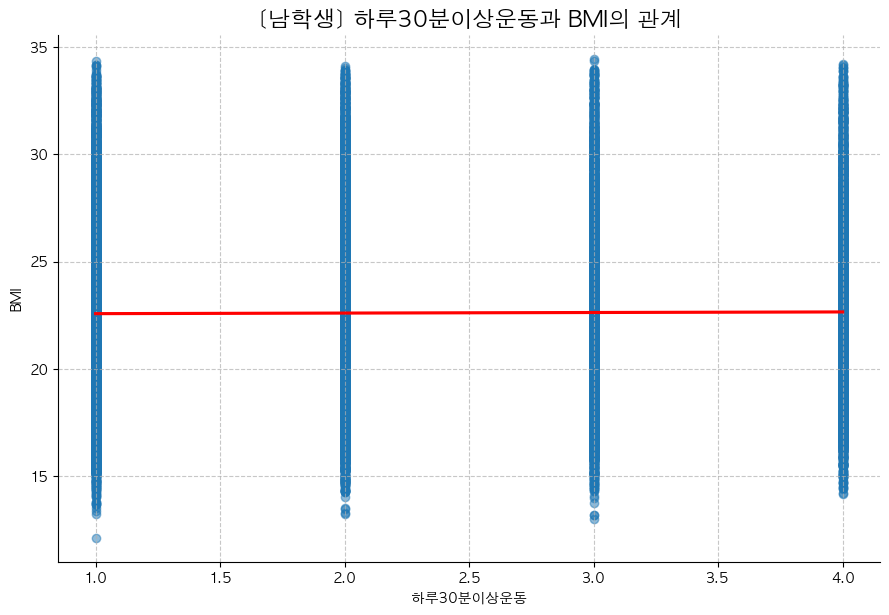

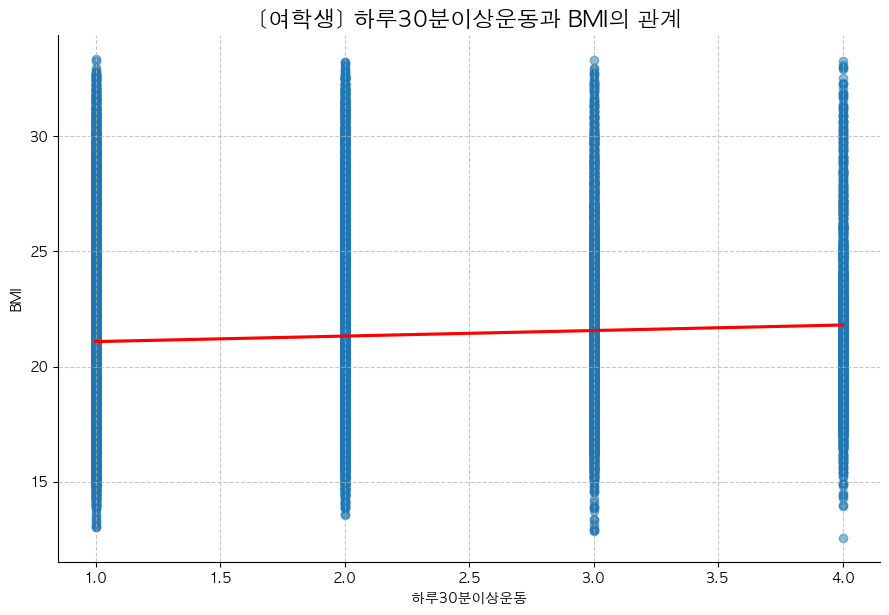

In [12]:
# 회귀선 시각화: 남학생
sns.lmplot(
    x='하루30분이상운동', 
    y='BMI', 
    data=male_data, 
    height=6, 
    aspect=1.5, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'}, 
    ci=None
)
plt.title("[남학생] 하루30분이상운동과 BMI의 관계", fontsize=16)
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# 회귀선 시각화: 여학생
sns.lmplot(
    x='하루30분이상운동', 
    y='BMI', 
    data=female_data, 
    height=6, 
    aspect=1.5, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'}, 
    ci=None
)
plt.title("[여학생] 하루30분이상운동과 BMI의 관계", fontsize=16)
plt.grid(alpha=0.7, linestyle='--')
plt.show()


남학생:

하루 30분 이상 운동과 BMI 간의 관계는 통계적으로 유의미하지 않음.
잔차가 정규성을 따르지 않고, 등분산성도 만족하지 않음 → OLS(선형 회귀) 결과를 신뢰하기 어려움.

여학생:

하루 30분 이상 운동과 BMI 간의 관계는 통계적으로 유의미하지 않음.
잔차는 정규성을 따르지 않으나, 등분산성은 만족

1. 잔차 정규성 검정 결과
남학생, 여학생, 성별 포함 다중 회귀에서 모두 잔차가 정규성을 따르지 않음.
Shapiro-Wilk Test의 p-value가 0.05 미만.
Q-Q Plot에서도 잔차의 분포가 정규 분포와 일치하지 않는 모습을 보일 가능성이 높음.
잔차가 정규성을 따르지 않는 경우, 선형 회귀 모델의 가정이 위반된 것으로 해석할 수 있음.
2. 잔차 등분산성 검정 결과
여학생 데이터에서는 잔차가 등분산성을 만족.
남학생과 성별 포함 다중 회귀에서는 잔차가 등분산성을 만족하지 않음.
Breusch-Pagan Test의 p-value가 0.05 미만으로 나왔음.
등분산성 위반은 선형 회귀의 또 다른 가정을 위반한 것이므로, 분석 결과의 신뢰성에 의문을 제기할 수 있음.
3. 회귀선 시각화
남학생과 여학생 데이터에 대한 산점도와 회귀선은 적합성이 부족해 보일 수 있음.
점들이 회귀선 주위에 고르게 분포하지 않는다면 선형 모델로 설명하기 어려울 수 있음.
이 경우 비선형 모델이나 다른 분석 방법을 고려해야 함.

In [13]:
from scipy.stats import kruskal

# Kruskal-Wallis Test (남학생)
stat_male, p_male = kruskal(
    male_data[male_data['하루30분이상운동'] == 1]['BMI'],
    male_data[male_data['하루30분이상운동'] == 2]['BMI'],
    male_data[male_data['하루30분이상운동'] == 3]['BMI'],
    male_data[male_data['하루30분이상운동'] == 4]['BMI']
)
print(f"[남학생] Kruskal-Wallis Test: H-Statistic = {stat_male:.4f}, p-value = {p_male:.4f}")

# Kruskal-Wallis Test (여학생)
stat_female, p_female = kruskal(
    female_data[female_data['하루30분이상운동'] == 1]['BMI'],
    female_data[female_data['하루30분이상운동'] == 2]['BMI'],
    female_data[female_data['하루30분이상운동'] == 3]['BMI'],
    female_data[female_data['하루30분이상운동'] == 4]['BMI']
)
print(f"[여학생] Kruskal-Wallis Test: H-Statistic = {stat_female:.4f}, p-value = {p_female:.4f}")


[남학생] Kruskal-Wallis Test: H-Statistic = 8.0872, p-value = 0.0442
[여학생] Kruskal-Wallis Test: H-Statistic = 144.7153, p-value = 0.0000


In [8]:
import numpy as np
import statsmodels.api as sm

# 로그 변환된 데이터 추가
male_data['log_BMI'] = np.log(male_data['BMI'])
female_data['log_BMI'] = np.log(female_data['BMI'])

# 남학생 회귀 분석 (로그 변환 데이터)
male_X_log = sm.add_constant(male_data['하루30분이상운동'])
male_y_log = male_data['log_BMI']
male_model_log = sm.OLS(male_y_log, male_X_log).fit()

print("\n[남학생 회귀 분석 결과 (로그 변환)]")
print(male_model_log.summary())

# 여학생 회귀 분석 (로그 변환 데이터)
female_X_log = sm.add_constant(female_data['하루30분이상운동'])
female_y_log = female_data['log_BMI']
female_model_log = sm.OLS(female_y_log, female_X_log).fit()

print("\n[여학생 회귀 분석 결과 (로그 변환)]")
print(female_model_log.summary())



[남학생 회귀 분석 결과 (로그 변환)]
                            OLS Regression Results                            
Dep. Variable:                log_BMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.423
Date:                Fri, 06 Dec 2024   Prob (F-statistic):             0.0199
Time:                        22:32:24   Log-Likelihood:                 7960.1
No. Observations:               26968   AIC:                        -1.592e+04
Df Residuals:                   26966   BIC:                        -1.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0966      0

/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_92092/770536144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['log_BMI'] = np.log(male_data['BMI'])
/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_92092/770536144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['log_BMI'] = np.log(female_data['BMI'])


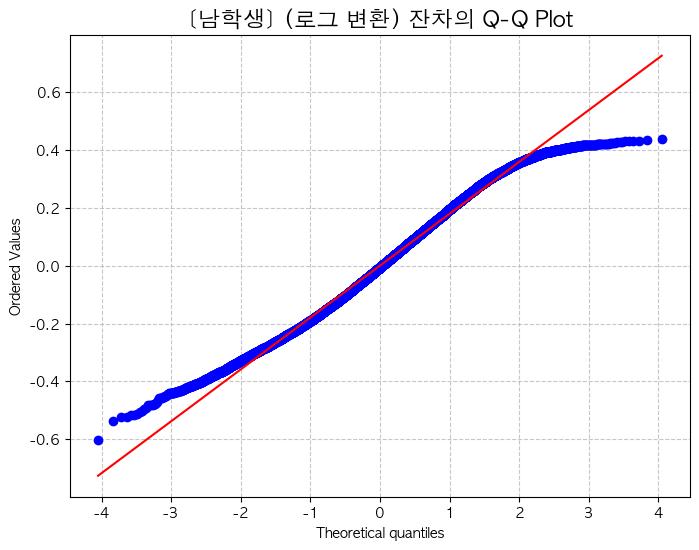

[남학생] (로그 변환) 잔차 정규성 검정: W-Statistic = 0.9917, p-value = 0.0000
 -> 잔차는 정규성을 따르지 않습니다.



/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26968.
  res = hypotest_fun_out(*samples, **kwds)


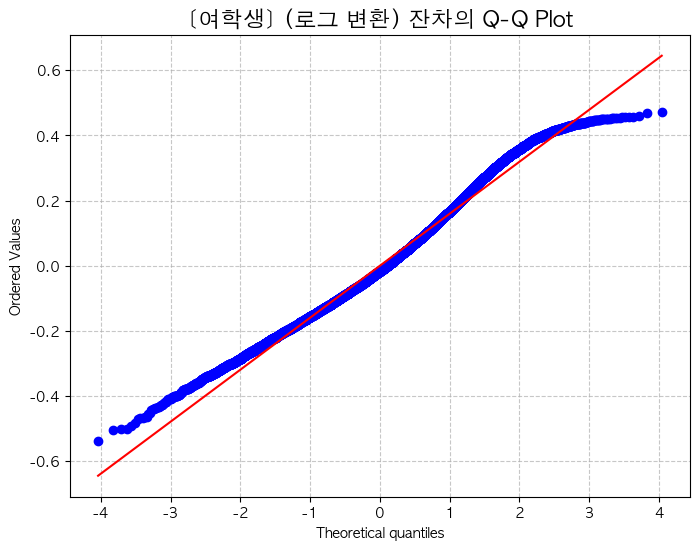

[여학생] (로그 변환) 잔차 정규성 검정: W-Statistic = 0.9876, p-value = 0.0000
 -> 잔차는 정규성을 따르지 않습니다.



/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26070.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
from scipy.stats import shapiro

# 잔차 정규성 검정 및 Q-Q Plot
def check_residuals(model, title):
    residuals = model.resid

    # Q-Q Plot
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"{title} 잔차의 Q-Q Plot", fontsize=16)
    plt.grid(alpha=0.7, linestyle='--')
    plt.show()

    # Shapiro-Wilk Test
    stat, p = shapiro(residuals)
    print(f"{title} 잔차 정규성 검정: W-Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(" -> 잔차는 정규성을 따릅니다.\n")
    else:
        print(" -> 잔차는 정규성을 따르지 않습니다.\n")

check_residuals(male_model_log, "[남학생] (로그 변환)")
check_residuals(female_model_log, "[여학생] (로그 변환)")


# 회귀 분석 결과 (로그 변환 적용)

## [남학생]
- **종속 변수**: \( \log(\text{BMI}) \)
- **회귀 모델 설명력**:
  - \( R^2 = 0.000 \): 회귀 모델이 남학생 BMI 변동을 거의 설명하지 못함.
- **운동 빈도의 회귀 계수 (\( \beta \))**:
  - \( \beta = 0.0024 \), \( p\text{-value} = 0.0199 \)
  - **해석**: 운동 빈도는 BMI에 유의미한 영향을 미치지만, 그 효과가 매우 작음.
  - 실제로 운동 빈도가 증가해도 BMI 변화는 크지 않을 가능성이 높음.

---

## [여학생]
- **잔차 정규성**:
  - 잔차는 정규성을 따르지 않음 (\( p\text{-value} = 0.0000 \)).
  - 이는 모델의 적합성을 낮추며, 비모수적 방법이나 데이터 변환, 모델 재설정이 필요.

---

## 결론
1. **남학생**:
   - 운동 빈도는 BMI에 유의미한 영향을 미치지만, 그 효과는 매우 미미하여 회귀 모델의 실질적 활용 가능성이 낮음.
2. **여학생**:
   - 모델 적합성이 떨어지므로, 비모수적 방법이나 추가적인 데이터 변환을 통한 모델링이 필요.
